In [1]:
%matplotlib inline

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
import sys
sys.path.append('/home/chenani/ownCloud/Workspaces/Eclipse/dataAnalysis/Sleep-current/src/')

In [3]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as pl
import pandas as pd
import cPickle as pkl
from signale.tools import locate
import os
from scipy.stats import ttest_ind,ranksums
from scipy.io import savemat,loadmat

/home/chenani/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/home/chenani/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [4]:
popPrcntDB = pd.DataFrame([],columns=['prcnt','Npop','N500','N150','N7','sig150','sig7',
                                      'swr500','prcnt500','swr150','prcnt150','swr7','prcnt7','sig_swr150','prcnt_sig150','sig_swr7','prcnt_sig7',
                                      'sleepTime','Rpop','R500','R150','R7','Rs150','Rs7',
                                      'group','session','animal','date'])
cntPath = '/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/control/'
lesPath = '/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/lesion/'
for item in locate('*l-RipplesTimeDB-SKLRN.pd',cntPath):
    pdFile = os.path.join(item[0],item[1])
    rippDB=pd.read_pickle(pdFile)
    #rippDB = rippDB[rippDB.wc==300]
    anName = item[1].split('Control')[0]
    anID = anName.split('Rat')[-1]
    for idd,dday in enumerate(np.unique(rippDB.date)):
        rDF = rippDB[rippDB.date==dday]
        rDF_PRE  = rDF[rDF.session=='PRE']
        rDF_POST = rDF[rDF.session=='POST']
        rTS = rDF.t_peak.as_matrix()/1e3
        rTStag = rDF.wc.as_matrix()
        rTS_PRE  = rDF_PRE.t_peak.as_matrix()/1e3
        rTS_PREtag  = rDF_PRE.wc.as_matrix()
        rTS_POST = rDF_POST.t_peak.as_matrix()/1e3
        rTS_POSTtag = rDF_POST.wc.as_matrix()
        roDBName = '*popDB-D'+str(idd+1)+'-Chsig.db'
        SleepDBName = 'SleepEpoch-'+anName+'-Day'+str(idd+1)+'.db'
        for popFile in locate(roDBName,item[0]):
            popPath = os.path.join(popFile[0],popFile[1])
            slpPath = os.path.join(popFile[0],SleepDBName)
            if popPath:
                slDB = pd.read_pickle(slpPath)
                slDB = slDB.replace('sleep01','PRE')
                slDB = slDB.replace('sleep02','POST')
                sleepTime_PRE = (slDB[(slDB.epoch!='AWAKE')&(slDB.session=='PRE')].t1-slDB[(slDB.epoch!='AWAKE')&(slDB.session=='PRE')].t0).sum()
                sleepTime_POS = (slDB[(slDB.epoch!='AWAKE')&(slDB.session=='POST')].t1-slDB[(slDB.epoch!='AWAKE')&(slDB.session=='POST')].t0).sum()
                pDF = pd.read_pickle(popPath)
                pDF = pDF[pDF.tSub>4]
                pDF = pDF[(pDF.epoch=='sws')|(pDF.epoch=='rem')]
                pDF = pDF.replace('sleep01','PRE')
                pDF = pDF.replace('sleep02','POST')
                pTS = pDF.t_peak.as_matrix()-0.02
                pTS_PRE = pDF[pDF.session=='PRE'].t_peak.as_matrix()-0.02
                pTS_POST = pDF[pDF.session=='POST'].t_peak.as_matrix()-0.02
                sigTS_PRE = pDF[(pDF.session=='PRE')&(pDF.Rpv==1)].t_peak.as_matrix()-0.02
                sigTS_POS = pDF[(pDF.session=='POST')&(pDF.Rpv==1)].t_peak.as_matrix()-0.02
                minDist_PRE = np.array([(rTS_PRE-tP)[np.power(rTS_PRE-tP,2).argmin()] for tP in pTS_PRE])
                minTags_PRE = np.array([rTS_PREtag[np.power(rTS_PRE-tP,2).argmin()] for tP in pTS_PRE])
                minDist_POST= np.array([(rTS_POST-tP)[np.power(rTS_POST-tP,2).argmin()] for tP in pTS_POST])
                minTags_POST= np.array([rTS_POSTtag[np.power(rTS_POST-tP,2).argmin()] for tP in pTS_POST])
                sigDist_PRE = np.array([(rTS_PRE-tP)[np.power(rTS_PRE-tP,2).argmin()] for tP in sigTS_PRE])
                sigTags_PRE = np.array([rTS_PREtag[np.power(rTS_PRE-tP,2).argmin()] for tP in sigTS_PRE])
                sigDist_POST= np.array([(rTS_POST-tP)[np.power(rTS_POST-tP,2).argmin()] for tP in sigTS_POS])
                sigTags_POST= np.array([rTS_POSTtag[np.power(rTS_POST-tP,2).argmin()] for tP in sigTS_POS])
                pop500_PRE  = np.where(np.abs(minDist_PRE)<0.5)[0]
                swr500_PRE  = np.sum(minTags_PRE[pop500_PRE]==300)
                pop150_PRE  = np.where(np.abs(minDist_PRE)<0.15)[0]
                swr150_PRE  = np.sum(minTags_PRE[pop150_PRE]==300)
                pop075_PRE  = np.where(np.abs(minDist_PRE)<0.0075)[0]
                swr075_PRE  = np.sum(minTags_PRE[pop075_PRE]==300)
                print swr075_PRE,pop075_PRE.size,'-->',1e2*swr075_PRE/pop075_PRE.size
                try:
                    s500Prcntpre = 1e2*swr500_PRE/pop500_PRE.size
                except ZeroDivisionError:
                    s500Prcntpre = np.nan
                try:
                    s150Prcntpre = 1e2*swr150_PRE/pop150_PRE.size
                except ZeroDivisionError:
                    s150Prcntpre = np.nan
                try:
                    s075Prcntpre = 1e2*swr075_PRE/pop075_PRE.size
                except ZeroDivisionError:
                    s075Prcntpre = np.nan
                ###
                pop500_POST = np.where(np.abs(minDist_POST)<0.5)[0]
                swr500_POST = np.sum(minTags_POST[pop500_POST]==300)
                pop150_POST = np.where(np.abs(minDist_POST)<0.15)[0]
                swr150_POST = np.sum(minTags_POST[pop150_POST]==300)
                pop075_POST = np.where(np.abs(minDist_POST)<0.0075)[0]
                swr075_POST = np.sum(minTags_POST[pop075_POST]==300)
                print swr075_POST,pop075_POST.size,'-->',1e2*swr075_POST/pop075_POST.size
                try:
                    s500Prcntpos = 1e2*swr500_POST/pop500_POST.size
                except ZeroDivisionError:
                    s500Prcntpos = np.nan
                try:
                    s150Prcntpos = 1e2*swr150_POST/pop150_POST.size
                except ZeroDivisionError:
                    s150Prcntpos = np.nan
                try:
                    s075Prcntpos = 1e2*swr075_POST/pop075_POST.size
                except ZeroDivisionError:
                    s075Prcntpos = np.nan
                ###
                sig150_PRE  = np.where(np.abs(sigDist_PRE)<0.15)[0]
                Sswr150_PRE = np.sum(sigTags_PRE[sig150_PRE]==300)
                sig075_PRE  = np.where(np.abs(sigDist_PRE)<0.0075)[0]
                Sswr075_PRE = np.sum(sigTags_PRE[sig075_PRE]==300)
                sig150_POST = np.where(np.abs(sigDist_POST)<0.15)[0]
                Sswr150_POST= np.sum(sigTags_POST[sig150_POST]==300)
                sig075_POST = np.where(np.abs(sigDist_POST)<0.0075)[0]
                Sswr075_POST= np.sum(sigTags_POST[sig075_POST]==300)
                try:
                    Ss150Prcntpre = 1e2*Sswr150_PRE/sig150_PRE.size
                except ZeroDivisionError:
                    Ss150Prcntpre = np.nan
                try:
                    Ss075Prcntpre = 1e2*Sswr075_PRE/sig075_PRE.size
                except ZeroDivisionError:
                    Ss075Prcntpre = np.nan

                try:
                    Ss150Prcntpos = 1e2*Sswr150_POST/sig150_POST.size
                except ZeroDivisionError:
                    Ss150Prcntpos = np.nan
                try:
                    Ss075Prcntpos = 1e2*Sswr075_POST/sig075_POST.size
                except ZeroDivisionError:
                    Ss075Prcntpos = np.nan
                ##########################################################
                print Sswr150_PRE,sig150_PRE.size,'-->',Ss150Prcntpre#'\n'
                print Sswr150_POST,sig150_POST.size,'-->',Ss150Prcntpos#,'\n'#,Sswr150_POST
                print anName,dday#,1e2*minDist_PRE.size/pTS_PRE.size,1e2*minDist_POST.size/pTS_POST.size
                ##########################################################
                popPrcntDB = popPrcntDB.append(pd.DataFrame([[1e2*pop500_PRE.size/pTS_PRE.size,pTS_PRE.size,pop500_PRE.size,pop150_PRE.size,pop075_PRE.size,sig150_PRE.size,sig075_PRE.size,
                                                              swr500_PRE,s500Prcntpre,swr150_PRE,s150Prcntpre,swr075_PRE,
                                                              s075Prcntpre,Sswr150_PRE,Ss150Prcntpre,Sswr075_PRE,Ss075Prcntpre,
                                                              sleepTime_PRE,pTS_PRE.size/sleepTime_PRE,pop500_PRE.size/sleepTime_PRE,pop150_PRE.size/sleepTime_PRE,pop075_PRE.size/sleepTime_PRE,
                                                              sig150_PRE.size/sleepTime_PRE,sig075_PRE.size/sleepTime_PRE,'control',
                                                              'PRE',anID,dday]],
                                                            columns=['prcnt','Npop','N500','N150','N7','sig150','sig7',
                                                                     'swr500','prcnt500','swr150','prcnt150','swr7',
                                                                     'prcnt7','sig_swr150','prcnt_sig150','sig_swr7','prcnt_sig7',
                                                                     'sleepTime','Rpop','R500','R150','R7','Rs150','Rs7','group',
                                                                     'session','animal','date']),ignore_index=True)
                popPrcntDB = popPrcntDB.append(pd.DataFrame([[1e2*pop500_POST.size/pTS_POST.size,pTS_POST.size,pop500_POST.size,pop150_POST.size,pop075_POST.size,sig150_POST.size,sig075_POST.size,
                                                              swr500_POST,s500Prcntpos,swr150_POST,s150Prcntpos,swr075_POST,
                                                              s075Prcntpos,Sswr150_POST,Ss150Prcntpos,Sswr075_POST,Ss075Prcntpos,
                                                              sleepTime_POS,pTS_POST.size/sleepTime_POS,pop500_POST.size/sleepTime_POS,pop150_POST.size/sleepTime_POS,pop075_POST.size/sleepTime_POS,
                                                              sig150_POST.size/sleepTime_POS,sig075_POST.size/sleepTime_POS,'control',
                                                              'POST',anID,dday]],
                                                            columns=['prcnt','Npop','N500','N150','N7','sig150','sig7',
                                                                     'swr500','prcnt500','swr150','prcnt150','swr7',
                                                                     'prcnt7','sig_swr150','prcnt_sig150','sig_swr7','prcnt_sig7',
                                                                     'sleepTime','Rpop','R500','R150','R7','Rs150','Rs7','group',
                                                                     'session','animal','date']),ignore_index=True)
                print '-------------------'
del minDist_PRE,minDist_POST,minTags_PRE,minTags_POST

12 14 --> 85.7142857143
153 201 --> 76.1194029851
1 1 --> 100.0
35 45 --> 77.7777777778
Rat614 day1
-------------------
35 44 --> 79.5454545455
70 78 --> 89.7435897436
6 10 --> 60.0
31 34 --> 91.1764705882
Rat3661 day1
-------------------
39 59 --> 66.1016949153
34 39 --> 87.1794871795
9 17 --> 52.9411764706
28 30 --> 93.3333333333
Rat3661 day2
-------------------
80 98 --> 81.6326530612
119 146 --> 81.5068493151
16 19 --> 84.2105263158
34 37 --> 91.8918918919
Rat3661 day3
-------------------
63 115 --> 54.7826086957
45 51 --> 88.2352941176
15 35 --> 42.8571428571
27 32 --> 84.375
Rat3906 day1
-------------------
2 3 --> 66.6666666667
3 4 --> 75.0
4 6 --> 66.6666666667
1 3 --> 33.3333333333
Rat3906 day2
-------------------
2 2 --> 100.0
1 3 --> 33.3333333333
1 2 --> 50.0
11 15 --> 73.3333333333
Rat3906 day3
-------------------
5 7 --> 71.4285714286
9 9 --> 100.0
0 0 --> nan
3 4 --> 75.0
Rat3906 day4
-------------------
0 1 --> 0.0
12 13 --> 92.3076923077
0 0 --> nan
8 10 --> 80.0
Rat61

In [126]:
sig150_POST.size

10

In [127]:
for item in locate('*-RipplesTimeDB-SKLRN.pd',lesPath):
    pdFile = os.path.join(item[0],item[1])
    rippDB=pd.read_pickle(pdFile)
    #rippDB = rippDB[rippDB.wc==300]
    anName = item[1].split('-')[0]
    anID = anName.split('Rat')[-1]
    for idd,dday in enumerate(np.unique(rippDB.date)):
        rDF = rippDB[rippDB.date==dday]
        rDF = rDF.replace('05-sleep05','PRE')
        rDF = rDF.replace('07-sleep06','POST')
        rDF = rDF.replace('01-sleep01','PRE')
        rDF = rDF.replace('03-sleep02','POST')
        rDF_PRE  = rDF[rDF.session=='PRE']
        rDF_POST = rDF[rDF.session=='POST']
        rTS = rDF.t_peak.as_matrix()/1e3
        rTStag = rDF.wc.as_matrix()
        rTS_PRE  = rDF_PRE.t_peak.as_matrix()/1e3
        rTS_PREtag  = rDF_PRE.wc.as_matrix()
        rTS_POST = rDF_POST.t_peak.as_matrix()/1e3
        rTS_POSTtag = rDF_POST.wc.as_matrix()
        roDBName = '*roDB-D'+str(idd+1)+'-Chsig.db'
        SleepDBName = 'SleepEpoch-'+anName+'-Day'+str(idd+1)+'.db'
        #print roDBName,anName
        for popFile in locate(roDBName,item[0]):
            popPath = os.path.join(popFile[0],popFile[1])
            slpPath = os.path.join(popFile[0],SleepDBName)
            print popFile[1],SleepDBName
            if popPath:
                slDB = pd.read_pickle(slpPath)
                slDB = slDB.replace('sleep01','PRE')
                slDB = slDB.replace('sleep02','POST')
                slDB = slDB.replace('sleep05','PRE')
                slDB = slDB.replace('sleep06','POST')
                sleepTime_PRE = (slDB[(slDB.epoch!='AWAKE')&(slDB.session=='PRE')].t1-slDB[(slDB.epoch!='AWAKE')&(slDB.session=='PRE')].t0).sum()
                sleepTime_POS = (slDB[(slDB.epoch!='AWAKE')&(slDB.session=='POST')].t1-slDB[(slDB.epoch!='AWAKE')&(slDB.session=='POST')].t0).sum()
                pDF = pd.read_pickle(popPath)
                pDF = pDF[pDF.tSub>4]
                pDF = pDF[(pDF.epoch=='sws')|(pDF.epoch=='rem')]
                pDF = pDF.replace('sleep01','PRE')
                pDF = pDF.replace('sleep02','POST')
                pDF = pDF.replace('sleep05','PRE')
                pDF = pDF.replace('sleep06','POST')
                pTS = pDF.t_peak.as_matrix()-0.02
                pTS_PRE = pDF[pDF.session=='PRE'].t_peak.as_matrix()-0.02
                pTS_POST = pDF[pDF.session=='POST'].t_peak.as_matrix()-0.02
                sigTS_PRE = pDF[(pDF.session=='PRE')&(pDF.Rpv==1)].t_peak.as_matrix()-0.02
                sigTS_POS = pDF[(pDF.session=='POST')&(pDF.Rpv==1)].t_peak.as_matrix()-0.02
                try:
                    minDist_PRE = np.array([(rTS_PRE-tP)[np.power(rTS_PRE-tP,2).argmin()] for tP in pTS_PRE])
                    minTags_PRE = np.array([rTS_PREtag[np.power(rTS_PRE-tP,2).argmin()] for tP in pTS_PRE])
                    minDist_POST= np.array([(rTS_POST-tP)[np.power(rTS_POST-tP,2).argmin()] for tP in pTS_POST])
                    minTags_POST= np.array([rTS_POSTtag[np.power(rTS_POST-tP,2).argmin()] for tP in pTS_POST])
                    sigDist_PRE = np.array([(rTS_PRE-tP)[np.power(rTS_PRE-tP,2).argmin()] for tP in sigTS_PRE])
                    sigTags_PRE = np.array([rTS_PREtag[np.power(rTS_PRE-tP,2).argmin()] for tP in sigTS_PRE])
                    sigDist_POST= np.array([(rTS_POST-tP)[np.power(rTS_POST-tP,2).argmin()] for tP in sigTS_POS])
                    sigTags_POST= np.array([rTS_POSTtag[np.power(rTS_POST-tP,2).argmin()] for tP in sigTS_POS])
                    pop500_PRE  = np.where(np.abs(minDist_PRE)<0.5)[0]
                    swr500_PRE  = np.sum(minTags_PRE[pop500_PRE]==300)
                    pop150_PRE  = np.where(np.abs(minDist_PRE)<0.15)[0]
                    swr150_PRE  = np.sum(minTags_PRE[pop150_PRE]==300)
                    pop075_PRE  = np.where(np.abs(minDist_PRE)<0.0075)[0]
                    swr075_PRE  = np.sum(minTags_PRE[pop075_PRE]==300)
                    try:
                        print '7ms_pre---',swr075_PRE,pop075_PRE.size,'-->',1e2*swr075_PRE/pop075_PRE.size
                    except:
                        print '7ms_pre---NAN'
                    try:
                        s500Prcntpre = 1e2*swr500_PRE/pop500_PRE.size
                    except ZeroDivisionError:
                        s500Prcntpre = np.nan
                    try:
                        s150Prcntpre = 1e2*swr150_PRE/pop150_PRE.size
                    except ZeroDivisionError:
                        s150Prcntpre = np.nan
                    try:
                        s075Prcntpre = 1e2*swr075_PRE/pop075_PRE.size
                    except ZeroDivisionError:
                        s075Prcntpre = np.nan
                    ###
                    pop500_POST = np.where(np.abs(minDist_POST)<0.5)[0]
                    swr500_POST = np.sum(minTags_POST[pop500_POST]==300)
                    pop150_POST = np.where(np.abs(minDist_POST)<0.15)[0]
                    swr150_POST = np.sum(minTags_POST[pop150_POST]==300)
                    pop075_POST = np.where(np.abs(minDist_POST)<0.0075)[0]
                    swr075_POST = np.sum(minTags_POST[pop075_POST]==300)
                    try:
                        print '7ms_pos---',swr075_POST,pop075_POST.size,'-->',1e2*swr075_POST/pop075_POST.size
                    except ZeroDivisionError:
                        print '7ms_pos---NANNNNNN'
                    try:
                        s500Prcntpos = 1e2*swr500_POST/pop500_POST.size
                    except ZeroDivisionError:
                        s500Prcntpos = np.nan
                    try:
                        s150Prcntpos = 1e2*swr150_POST/pop150_POST.size
                    except ZeroDivisionError:
                        s150Prcntpos = np.nan
                    try:
                        s075Prcntpos = 1e2*swr075_POST/pop075_POST.size
                    except ZeroDivisionError:
                        s075Prcntpos = np.nan
                    ###
                    sig150_PRE  = np.where(np.abs(sigDist_PRE)<0.15)[0]
                    Sswr150_PRE = np.sum(sigTags_PRE[sig150_PRE]==300)
                    sig075_PRE  = np.where(np.abs(sigDist_PRE)<0.0075)[0]
                    Sswr075_PRE = np.sum(sigTags_PRE[sig075_PRE]==300)
                    sig150_POST = np.where(np.abs(sigDist_POST)<0.15)[0]
                    Sswr150_POST= np.sum(sigTags_POST[sig150_POST]==300)
                    sig075_POST = np.where(np.abs(sigDist_POST)<0.0075)[0]
                    Sswr075_POST= np.sum(sigTags_POST[sig075_POST]==300)
                    try:
                        Ss150Prcntpre = 1e2*Sswr150_PRE/sig150_PRE.size
                    except ZeroDivisionError:
                        Ss150Prcntpre = np.nan
                    try:
                        Ss075Prcntpre = 1e2*Sswr075_PRE/sig075_PRE.size
                    except ZeroDivisionError:
                        Ss075Prcntpre = np.nan
    
                    try:
                        Ss150Prcntpos = 1e2*Sswr150_POST/sig150_POST.size
                    except ZeroDivisionError:
                        Ss150Prcntpos = np.nan
                    try:
                        Ss075Prcntpos = 1e2*Sswr075_POST/sig075_POST.size
                    except ZeroDivisionError:
                        Ss075Prcntpos = np.nan
                    ##########################################################
                    print Sswr150_PRE,sig150_PRE.size,'-->',Ss150Prcntpre#'\n'
                    print Sswr150_POST,sig150_POST.size,'-->',Ss150Prcntpos#,'\n'#,Sswr150_POST
                    print anName,dday,pTS_PRE.size,pTS_POST.size,#,1e2*minDist_PRE.size/pTS_PRE.size,1e2*minDist_POST.size/pTS_POST.size
                    ##########################################################
                    
                    try:
                        popPrcntDB = popPrcntDB.append(pd.DataFrame([[1e2*pop500_PRE.size/pTS_PRE.size,pTS_PRE.size,pop500_PRE.size,pop150_PRE.size,pop075_PRE.size,sig150_PRE.size,sig075_PRE.size,
                                                                  swr500_PRE,s500Prcntpre,swr150_PRE,s150Prcntpre,swr075_PRE,
                                                                  s075Prcntpre,Sswr150_PRE,Ss150Prcntpre,Sswr075_PRE,Ss075Prcntpre,
                                                                  sleepTime_PRE,pTS_PRE.size/sleepTime_PRE,pop500_PRE.size/sleepTime_PRE,pop150_PRE.size/sleepTime_PRE,pop075_PRE.size/sleepTime_PRE,
                                                                  sig150_PRE.size/sleepTime_PRE,sig075_PRE.size/sleepTime_PRE,'lesion',
                                                                  'PRE',anID,dday]],
                                                                columns=['prcnt','Npop','N500','N150','N7','sig150','sig7',
                                                                         'swr500','prcnt500','swr150','prcnt150','swr7',
                                                                         'prcnt7','sig_swr150','prcnt_sig150','sig_swr7','prcnt_sig7',
                                                                         'sleepTime','Rpop','R500','R150','R7','Rs150','Rs7','group',
                                                                         'session','animal','date']),ignore_index=True)
                    except ZeroDivisionError:
                        print 'JuuuuuuuuuuuuuuuuuuuuuMP!'
                    try:
                        popPrcntDB = popPrcntDB.append(pd.DataFrame([[1e2*pop500_POST.size/pTS_POST.size,pTS_POST.size,pop500_POST.size,pop150_POST.size,pop075_POST.size,sig150_POST.size,sig075_POST.size,
                                                                  swr500_POST,s500Prcntpos,swr150_POST,s150Prcntpos,swr075_POST,
                                                                  s075Prcntpos,Sswr150_POST,Ss150Prcntpos,Sswr075_POST,Ss075Prcntpos,
                                                                  sleepTime_POS,pTS_POST.size/sleepTime_POS,pop500_POST.size/sleepTime_POS,pop150_POST.size/sleepTime_POS,pop075_POST.size/sleepTime_POS,
                                                                  sig150_POST.size/sleepTime_POS,sig075_POST.size/sleepTime_POS,'lesion',
                                                                  'POST',anID,dday]],
                                                                columns=['prcnt','Npop','N500','N150','N7','sig150','sig7',
                                                                         'swr500','prcnt500','swr150','prcnt150','swr7',
                                                                         'prcnt7','sig_swr150','prcnt_sig150','sig_swr7','prcnt_sig7',
                                                                         'sleepTime','Rpop','R500','R150','R7','Rs150','Rs7','group',
                                                                         'session','animal','date']),ignore_index=True)
                    except ZeroDivisionError:
                        print 'JuuuuuuuuuuuuuuuuuuuuuMP!'
                    
                except (ValueError,ZeroDivisionError) as e:
                    print anID,'Zeroooooooooooooooooooo!!!'
                    print e
                print '----------------------'

3837-roDB-D1-Chsig.db SleepEpoch-Rat3837-Day1.db
7ms_pre--- 25 41 --> 60.9756097561
7ms_pos--- 58 84 --> 69.0476190476
10 16 --> 62.5
10 16 --> 62.5
Rat3837 day1 233 285 ----------------------
3837-roDB-D3-Chsig.db SleepEpoch-Rat3837-Day3.db
7ms_pre--- 0 0 --> 7ms_pre---NAN
7ms_pos--- 9 11 --> 81.8181818182
0 0 --> nan
0 0 --> nan
Rat3837 day3 1 36 ----------------------
434-roDB-D1-Chsig.db SleepEpoch-Rat434-Day1.db
7ms_pre--- 14 25 --> 56.0
7ms_pos--- 86 104 --> 82.6923076923
6 7 --> 85.7142857143
44 56 --> 78.5714285714
Rat434 day1 339 419 ----------------------
3838-roDB-D1-Chsig.db SleepEpoch-Rat3838-Day1.db
7ms_pre--- 0 0 --> 7ms_pre---NAN
7ms_pos--- 0 0 --> 7ms_pos---NANNNNNN
0 0 --> nan
0 0 --> nan
Rat3838 day1 1 0 JuuuuuuuuuuuuuuuuuuuuuMP!
----------------------
3838-roDB-D2-Chsig.db SleepEpoch-Rat3838-Day2.db
7ms_pre--- 3 5 --> 60.0
7ms_pos--- 9 12 --> 75.0
0 0 --> nan
4 4 --> 100.0
Rat3838 day2 31 106 ----------------------
3838-roDB-D3-Chsig.db SleepEpoch-Rat3838-Day3.db
7m

In [114]:
pTS_PRE.size

4

In [128]:
popPrcntDB.to_pickle('/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/files/pop-SWR-prcnt.db')

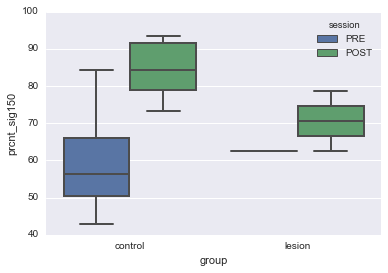

In [129]:
sns.boxplot(x='group',y='prcnt_sig150',data= popPrcntDB[popPrcntDB.sig150>9],hue='session',hue_order=['PRE','POST'],whis=2)
#pl.ylim(-0.01,0.06)
#popPrcntDB

In [8]:
#popPrcntDB.drop(['sig150','sig7','Rs150','Rs7'],1).to_pickle('/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/files/pop-SWR-prcnt-NoSig.db')

In [19]:
print 'c vs. l         ---',ttest_ind(popPrcntDB[popPrcntDB.group=='control'].prcnt,popPrcntDB[popPrcntDB.group=='lesion'].prcnt)
print 'c vs. l         ---',ranksums(popPrcntDB[popPrcntDB.group=='control'].prcnt,popPrcntDB[popPrcntDB.group=='lesion'].prcnt)
print 'cPRE vs. lPRE   ---',ttest_ind(popPrcntDB[(popPrcntDB.group=='control')& (popPrcntDB.session=='PRE')].prcnt,
                              popPrcntDB[(popPrcntDB.group=='lesion')&(popPrcntDB.session=='PRE')].prcnt)
print 'cPOST vs. lPOST ---',ttest_ind(popPrcntDB[(popPrcntDB.group=='control')& (popPrcntDB.session=='POST')].prcnt,
                              popPrcntDB[(popPrcntDB.group=='lesion')&(popPrcntDB.session=='POST')].prcnt)


c vs. l         --- Ttest_indResult(statistic=-0.34828569015884514, pvalue=0.73023072445815729)
c vs. l         --- RanksumsResult(statistic=-0.16933350266692068, pvalue=0.86553432515615958)
cPRE vs. lPRE   --- Ttest_indResult(statistic=0.35665604744053681, pvalue=0.72707152649851414)
cPOST vs. lPOST --- Ttest_indResult(statistic=-0.84432788794723279, pvalue=0.41375453893951686)


In [195]:
savemat('/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/files/pop-SWR-prcnt-noSig.mat',
        popPrcntDB.drop(['sig150','sig7','Rs150','Rs7'],1).to_dict(orient='list'))

In [130]:
savemat('/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/files/pop-SWR-prcnt.mat',popPrcntDB.to_dict(orient='list'))

In [52]:
popPrcntDB.keys()

Index([u'prcnt', u'Npop', u'N500', u'N150', u'N7', u'sig150', u'sig7',
       u'swr500', u'prcnt500', u'swr150', u'prcnt150', u'swr7', u'prcnt7',
       u'sig_swr150', u'prcnt_sig150', u'sig_swr7', u'prcnt_sig7',
       u'sleepTime', u'Rpop', u'R500', u'R150', u'R7', u'Rs150', u'Rs7',
       u'group', u'session', u'animal', u'date'],
      dtype='object')

In [117]:
popPrcntDB[['sleepTime','group','animal']]

,sleepTime,group,animal
0,171.192,control,614
1,2052.266,control,614
2,3537.968,control,3661
3,3571.595,control,3661
4,4648.678,control,3661
5,3497.208,control,3661
6,3663.305,control,3661
7,3495.170,control,3661
8,1600.849,control,3906
9,1629.381,control,3906


In [121]:
popPrcntDB.loc[49]

prcnt               NaN
Npop                  0
N500                  0
N150                  0
N7                    0
sig150                0
sig7                  0
swr500                0
prcnt500            NaN
swr150                0
prcnt150            NaN
swr7                  0
prcnt7              NaN
sig_swr150            0
prcnt_sig150        NaN
sig_swr7              0
prcnt_sig7          NaN
sleepTime       2752.32
Rpop                  0
R500                  0
R150                  0
R7                    0
Rs150                 0
Rs7                   0
group            lesion
session            POST
animal             3838
date               day1
Name: 49, dtype: object